# Topic - Malaria Detection

## Dataset Description

Dataset name: Malaria cell images <br>
Source: https://lhncbc.nlm.nih.gov/publication/pub9932

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable. According to WHO there are 212 Million malaria cases and 435000 deaths. Early diagnostics and treatment of malaria can prevent deaths. Malaria is prevalent across the world especially in tropical regions the severity of malaria varies based on the species of plasmodium. Symptoms are chills, fever and sweating, usually occurring a few weeks after being bitten.

## Objective
To build the deep learning model that will reduce the burden for microscopists for malaria detection in resource-constrained regions and improve diagnostic accuracy.

## Approach
I have used convolutional neural network (CNN) to perform image classification using Tensorflow 2.0 in Python, different maxpooling and convolutional layers were added to the neural network. 

## Reading and Understanding Data

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data_dir = 'F:\Work\Desktop\Courses_inside\More\Datasets\cell_images'

In [7]:
os.listdir(data_dir)

['test', 'train']

In [8]:
# this we allow us to read image file directly.
from matplotlib.image import imread

In [9]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [10]:
print('Test path = ', test_path)
print('Train path = ', train_path)

Test path =  F:\Work\Desktop\Courses_inside\More\Datasets\cell_images\test\
Train path =  F:\Work\Desktop\Courses_inside\More\Datasets\cell_images\train\


In [11]:
print('Test labels = ', os.listdir(test_path))
print('Train labels = ', os.listdir(train_path))

Test labels =  ['parasitized', 'uninfected']
Train labels =  ['parasitized', 'uninfected']


## Visualizing the Data

In [12]:
print('Parasitized image at index 0 = ', os.listdir(train_path+'parasitized')[0])
print('Uninfected image at index 0 = ', os.listdir(train_path+'uninfected')[0])

Parasitized image at index 0 =  C100P61ThinF_IMG_20150918_144104_cell_162.png
Uninfected image at index 0 =  C100P61ThinF_IMG_20150918_144104_cell_128.png


In [13]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
uninfected_cell = train_path+'uninfected\\'+os.listdir(train_path+'uninfected')[0]

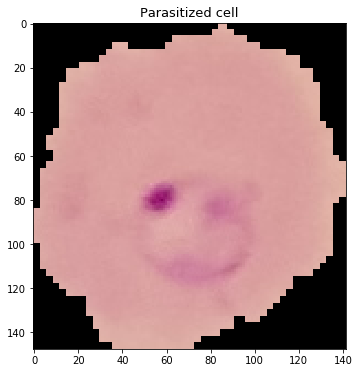

In [15]:
plt.figure(figsize = (14,6))
plt.imshow(imread(para_cell))
plt.title('Parasitized cell',fontsize = 13);

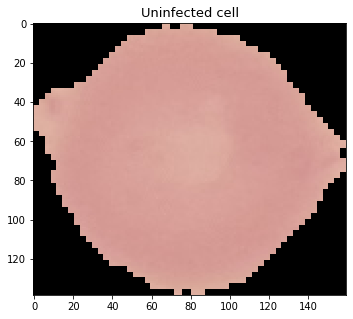

In [16]:
plt.figure(figsize = (15,5))
plt.imshow(imread(uninfected_cell))
plt.title('Uninfected cell',fontsize = 13);

In [17]:
print('Number of train images = ', len(os.listdir(train_path+'parasitized')))
print('Number of test images = ', len(os.listdir(test_path+'parasitized')))

Number of train images =  12480
Number of test images =  1300


In [18]:
image_count = pd.DataFrame({'set': ['train class 0','test class 0'], 'count':[12480,1300]})

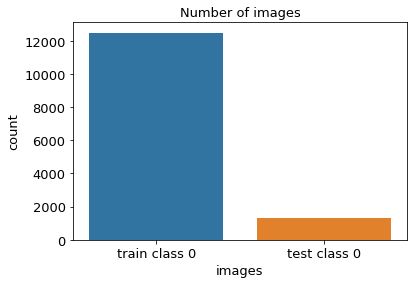

In [19]:
sns.barplot('set','count',data=image_count)
plt.title('Number of images',fontsize=13)
plt.ylabel('count',fontsize=13)
plt.xlabel('images',fontsize=13)
plt.tick_params(labelsize=13);

Let's find out the average dimensions of these images.

In [20]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

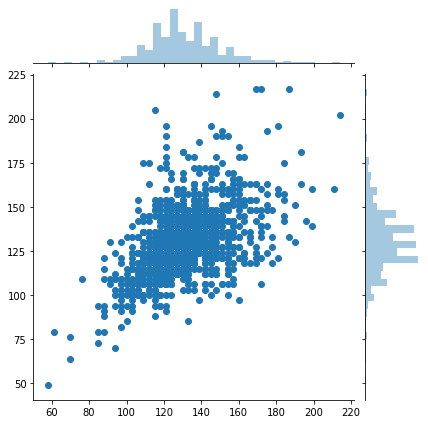

In [21]:
sns.jointplot(dim1,dim2);

we have images of alot of different size that is 50/50, 125/125, 200/200.

In [22]:
np.mean(dim1)

130.92538461538462

In [23]:
np.mean(dim2)

130.75

In [24]:
image_shape = (130,130,3)
print('Final image shape = ',image_shape)

Final image shape =  (130, 130, 3)


## Preparing the Data for the model

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                               height_shift_range=0.1, zoom_range=0.1,
                               horizontal_flip=True, fill_mode='nearest')

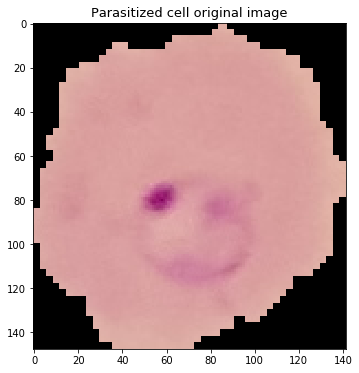

In [27]:
plt.figure(figsize = (14,6))
para_img = imread(para_cell)
plt.imshow(para_img)
plt.title('Parasitized cell original image',fontsize = 13);

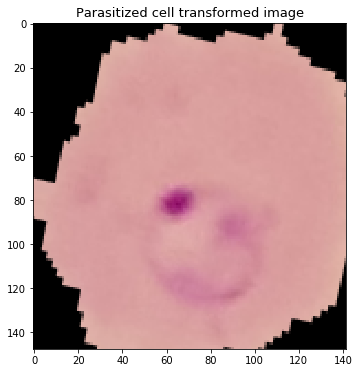

In [28]:
plt.figure(figsize = (14,6))
plt.imshow(image_gen.random_transform(para_img))
plt.title('Parasitized cell transformed image',fontsize = 13);

Generating many manipulated images from a directory.

In [29]:
image_gen.flow_from_directory(train_path);
image_gen.flow_from_directory(test_path);

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


## Model Building

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons.
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [38]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 1069s 685ms/step - loss: 7.7021 - accuracy: 0.5003 - val_loss: 7.7361 - val_accuracy: 0.5000
Epoch 2/20
1560/1560 [==============================] - 476s 305ms/step - loss: 7.6787 - accuracy: 0.5019 - val_loss: 7.7361 - val_accuracy: 0.5000
Epoch 3/20
1560/1560 [==============================] - 472s 302ms/step - loss: 7.7340 - accuracy: 0.4984 - val_loss: 7.7361 - val_accuracy: 0.5000


In [39]:
from tensorflow.keras.models import load_model

In [40]:
model = load_model('malaria_detector.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Evaluating the Model

In [41]:
import json
with open("history.json", "r") as read_file:
    history_load_data = json.load(read_file)
history_load_data = pd.DataFrame(history_load_data)

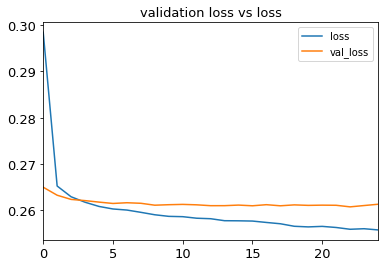

In [42]:
history_load_data[['loss','val_loss']].plot();
plt.title('validation loss vs loss',fontsize=13);
plt.tick_params(labelsize=13);

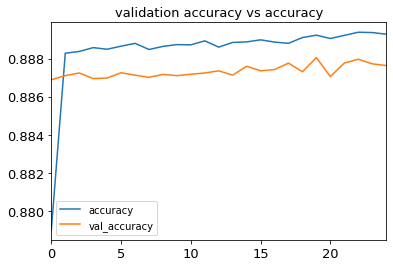

In [43]:
history_load_data[['accuracy','val_accuracy']].plot()
plt.title('validation accuracy vs accuracy',fontsize=13);
plt.tick_params(labelsize=13);

In [44]:
model.evaluate_generator(test_image_gen)

[1.8938070354987049, 0.875]

Model accuracy = 88.0%

In [45]:
pred_acc = model.predict_generator(test_image_gen)
predictions = pred_acc > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1300
           1       0.98      0.76      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



## Predicting on an Image

In [47]:
from tensorflow.keras.preprocessing import image

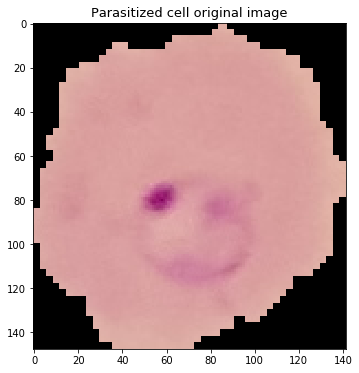

In [50]:
plt.figure(figsize = (14,6))
para_img = imread(para_cell)
plt.imshow(para_img)
plt.title('Parasitized cell',fontsize = 13);

In [53]:
my_image = image.load_img(para_cell,target_size=image_shape)
my_image_arr = image.img_to_array(my_image)
my_image_arr = np.expand_dims(my_image_arr,axis=0)
my_image_arr.shape

(1, 130, 130, 3)

In [54]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [55]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Our model predicted this cell image belongs to class-0 (parasitized class)<br>

### Thankyou